In [ ]:
# importing libararies

In [2]:
import pandas as pd

In [3]:
# reading files

In [5]:
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')

In [7]:
# displaying the first 5 rows of the DataFrame 'df'

In [8]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
# Selecting only the specified columns from the dataset

In [10]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 
               'Propertycount', 'Distance','Bedroom2', 'Bathroom', 'Car', 
               'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]


### missing values

In [11]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [12]:
# List of columns where missing values will be filled with zeros
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# Filling missing values in the 'Landsize' column with the mean value of the column
dataset['Landsize'] = dataset['Landsize'].fillna(dataset['Landsize'].mean())

# Filling missing values in the 'BuildingArea' column with the mean value of the column
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset['BuildingArea'].mean())


In [13]:
# Droping rows with missing values from the DataFrame
dataset.dropna(inplace=True)


In [14]:
dataset.shape

(27244, 14)

### Outlier handling

In [15]:
from scipy import stats
q1 = dataset['Rooms'].quantile(q=0.25)
q3 = dataset['Rooms'].quantile(q=0.75)
IQR = q3 - q1

print('1st quartile = {} \n3rd quartile range = {} \ninterquartile range = {} '
      .format(q1, q3, stats.iqr(dataset['Rooms'])))

1st quartile = 2.0 
3rd quartile range = 4.0 
interquartile range = 2.0 


In [16]:
lower_outlier = q1 - 1.5 * IQR

upper_outlier = q3 + 1.5 * IQR

print('lower outlier = ', lower_outlier)
print('upper outlier = ', upper_outlier)

lower outlier =  -1.0
upper outlier =  7.0


In [17]:
print('Number of upper outliers = ', dataset[dataset['Rooms'] > upper_outlier]['Rooms'].count())
print('Number of lower outliers = ', dataset[dataset['Rooms'] < lower_outlier]['Rooms'].count())

Number of upper outliers =  23
Number of lower outliers =  0


In [18]:
dataset.loc[(dataset['Rooms'] < lower_outlier) | (dataset['Rooms'] > upper_outlier),
            ['Rooms']] = dataset['Rooms'].median()

In [19]:
print('Number of upper outliers = ',
      dataset[dataset['Rooms'] > upper_outlier]['Rooms'].count())

print('Number of lower outliers = ',
      dataset[dataset['Rooms'] < lower_outlier]['Rooms'].count())

Number of upper outliers =  0
Number of lower outliers =  0


In [22]:
for cols in dataset.columns[:-1]:
    if dataset[cols].dtype == object:
        continue
    else:
        Q1 = dataset[cols].quantile(q=0.25)
        Q3 = dataset[cols].quantile(q=0.75)
        IQR = Q3 - Q1

        low = Q1 - 1.5 * IQR
        high = Q3 + 1.5 * IQR

        dataset.loc[(dataset[cols] < low) | (dataset[cols] > high), cols] = dataset[cols].median()

C:\Users\jamts\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


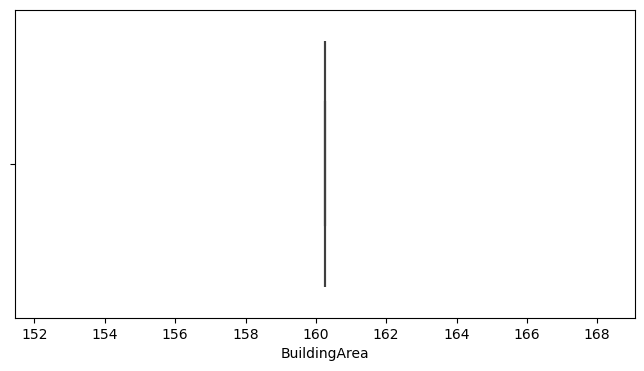

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 4))

# Create a horizontal boxplot for the 'BuildingArea' column
sns.boxplot(x='BuildingArea', data=dataset, orient='h')

# Show the plot
plt.show()

In [25]:
print(dataset.shape)

dataset1_num_col = dataset.drop(['Car', 'Suburb', 'Type', 'Method', 'SellerG', 'Regionname', 'Price'], axis=1)

print(dataset1_num_col.shape)

dataset1_num_col.head()

(27244, 14)
(27244, 7)


,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Landsize,BuildingArea
1,2,4019.0,2.5,2.0,1.0,202.0,160.2564
2,2,4019.0,2.5,2.0,1.0,156.0,160.2564
4,3,4019.0,2.5,3.0,2.0,134.0,160.2564
5,3,4019.0,2.5,3.0,2.0,94.0,160.2564
6,4,4019.0,2.5,3.0,1.0,120.0,160.2564


In [29]:
dataset_cat = pd.get_dummies(dataset, drop_first=True)
print(dataset_cat.shape)

(27244, 713)


In [68]:
# One-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

In [32]:
dataset= pd.concat([dataset1_num_col,dataset_cat],axis = 1)
dataset.shape

(27244, 720)

In [33]:
dataset.corr()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,Rooms,Propertycount,Distance,...,SellerG_iProperty,SellerG_iSell,SellerG_iTRAK,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
Rooms,1.000000,-0.061254,0.315521,0.554088,0.411772,0.362793,NaN,1.000000,-0.061254,0.315521,...,0.000083,-0.000879,0.007442,0.041889,-0.127206,0.039370,0.061489,-0.065584,0.048780,0.014713
Propertycount,-0.061254,1.000000,-0.072437,-0.016353,-0.003662,-0.053598,NaN,-0.061254,1.000000,-0.072437,...,-0.004705,0.012972,0.002574,-0.024355,0.154201,-0.054659,-0.062513,0.090168,-0.147851,-0.046407
Distance,0.315521,-0.072437,1.000000,0.153703,0.098960,0.343799,NaN,0.315521,-0.072437,1.000000,...,0.008671,0.065144,0.029938,0.004269,-0.158396,0.037143,0.260878,-0.177033,-0.000684,0.003242
Bedroom2,0.554088,-0.016353,0.153703,1.000000,0.838180,0.021490,NaN,0.554088,-0.016353,0.153703,...,0.002715,-0.008749,0.014408,0.032293,-0.064064,0.032293,0.035769,-0.061590,0.043613,0.025425
Bathroom,0.411772,-0.003662,0.098960,0.838180,1.000000,-0.080908,NaN,0.411772,-0.003662,0.098960,...,0.005736,-0.010774,0.012967,0.024773,-0.083128,0.035742,0.018730,0.002839,0.019581,0.005885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Regionname_Northern Victoria,0.039370,-0.054659,0.037143,0.032293,0.035742,0.042460,NaN,0.039370,-0.054659,0.037143,...,-0.000474,-0.002373,-0.002643,-0.006130,-0.049876,1.000000,-0.017815,-0.052834,-0.040787,-0.004656
Regionname_South-Eastern Metropolitan,0.061489,-0.062513,0.260878,0.035769,0.018730,0.101062,NaN,0.061489,-0.062513,0.260878,...,-0.001379,0.133197,-0.002647,-0.017815,-0.144939,-0.017815,1.000000,-0.153535,-0.118526,-0.013530
Regionname_Southern Metropolitan,-0.065584,0.090168,-0.177033,-0.061590,0.002839,-0.074656,NaN,-0.065584,0.090168,-0.177033,...,-0.004088,-0.020450,-0.022775,-0.052834,-0.429847,-0.052834,-0.153535,1.000000,-0.351514,-0.040127
Regionname_Western Metropolitan,0.048780,-0.147851,-0.000684,0.043613,0.019581,-0.005128,NaN,0.048780,-0.147851,-0.000684,...,-0.003156,-0.015787,-0.017582,-0.040787,-0.331832,-0.040787,-0.118526,-0.351514,1.000000,-0.030977


### Data Standardization

In [35]:
# x represents features(independent variables)
# y represents target column(dependent variable) to be predicted or analyzed.

In [36]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

print(X.shape)
print(y.shape)

(27244, 719)
(27244,)


In [37]:
from sklearn.preprocessing import StandardScaler
# defineing min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [38]:
# x_train(features) & y_train(target column) are for the training set.
# x_test(features) & y_test(target column) are for the testing set.
# test_size = 0.2 indicates that 20% of the data will be used for testing,
# random_state = 40 sets a seed for randomization to ensure reproducibility.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=40)

In [40]:
# Fiting the model to the training data
# predicting training set
# predicting testing set

In [43]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

Reg_predict = reg.predict(X_test)
Reg_pred_train = reg.predict(X_train)

In [44]:
from sklearn import metrics

print("R score:", metrics.r2_score(y_test, Reg_predict))
print("MSE =", metrics.mean_squared_error(y_test, Reg_predict))
print("R_score:", metrics.r2_score(y_train, Reg_pred_train))
print("MSE Train:", metrics.mean_squared_error(y_train, Reg_pred_train))

R score: -6.92873898691711e+26
MSE = 2.8697684203771085e+38
R_score: 0.6781530854058526
MSE Train: 132218812969.11893


In [46]:
# Simple Regression
x = dataset['Rooms'].iloc[:,:-1].values
y = dataset['Price'].values
print(x.shape)
print(y.shape)

(27244, 1)
(27244,)


In [47]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler=StandardScaler()
# transform data
scaled=scaler.fit_transform(x)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=40)

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

Reg_predict = reg.predict(X_test)
Reg_train_predict = reg.predict(X_train)

In [50]:
from sklearn import metrics

print("R score Test", metrics.r2_score(y_test, Reg_predict))
print("MSE Test= ", metrics.mean_squared_error(y_test, Reg_predict))
print("R score Train", metrics.r2_score(y_train, Reg_train_predict))
print("MSE Train= ", metrics.mean_squared_error(y_train, Reg_train_predict))

R score Test 0.20903108291078887
MSE Test=  327606166727.96204
R score Train 0.21747225615327836
MSE Train=  321472366877.5471


### Using Lasso (L1 Regularization) Regression Model

In [55]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()

lasso_reg.fit(X_train, y_train)

y_pred_lasso_train = lasso_reg.predict(X_train)
y_pred_lasso_test = lasso_reg.predict(X_test)

C:\Users\jamts\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+15, tolerance: 8.954e+11
  model = cd_fast.enet_coordinate_descent(


In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)

reg = LinearRegression().fit(X_train, y_train)
Reg_predict = reg.predict(X_test)
Reg_pred_train = reg.predict(X_train)

In [57]:
lasso_reg.score(X_test,y_test)

0.667377562224079

In [59]:
lasso_reg.score(X_train,y_train)

0.6789301847107857

### Using Ridge(L2 Regularization) Regression Model

In [60]:
from sklearn.linear_model import Ridge
ridge_reg =Ridge()
ridge_reg.fit(X_train,y_train)

Ridge()

In [61]:
ridge_reg.score(X_test,y_test)

0.6673013695052004

In [62]:
ridge_reg.score(X_train,y_train)

0.6789363096805637

### Using Elastic Net(En Regularization) Regression Model

In [64]:
from sklearn.linear_model import ElasticNet
en_reg=ElasticNet()
en_reg.fit(X_train,y_train)

ElasticNet()

In [65]:
en_reg.score(X_test,y_test)

0.6276302523573858

In [66]:
en_reg.score(X_train,y_train)

0.6410270474914657

In [67]:
X.shape

(27244, 719)